In [12]:
# import necessary libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# loading mnist train and test dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# preprocess our labels by one-hot encoding them
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [14]:
# checking the shape of our train dataset
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000, 10)


In [15]:
# checking the shape of our test dataset
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000, 10)


In [19]:
# defining the model in keras using Sequential api
model = Sequential(
    [
        layers.Input(shape=(28,28)), # input layer
        layers.Flatten(), # this flattens the input, output shape will be (1,784)
        layers.Dense(128, activation='relu'), # dense layer with 128 neurons and relu activation function
        layers.Dense(64, activation='relu'), # dense layer with 64 neurons and relu activation function
        layers.Dense(10, activation='softmax') # # dense layer with 10 neurons and softmax activation function
    ]
)

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# compiling the model using Adam optimizer and categorical-crossentropy as loss function and using accuracy for metric
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# starting the training process for 10 epochs with batch size of 64 and also putting 20% of train set for validation set
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 9s 4ms/step - loss: 2.0047 - accuracy: 0.8302 - val_loss: 0.4937 - val_accuracy: 0.8955
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3810 - accuracy: 0.9073 - val_loss: 0.3443 - val_accuracy: 0.9161
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2643 - accuracy: 0.9304 - val_loss: 0.3371 - val_accuracy: 0.9234
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2021 - accuracy: 0.9437 - val_loss: 0.2587 - val_accuracy: 0.9426
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.1673 - accuracy: 0.9531 - val_loss: 0.2217 - val_accuracy: 0.9478
Epoch 6/10
750/750 [==============================] - 3s 5ms/step - loss: 0.1510 - accuracy: 0.9566 - val_loss: 0.2341 - val_accuracy: 0.9473
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1301 - accuracy: 0.9622 - val_loss: 0.1753 - val_accuracy: 0.9545
Epoch 

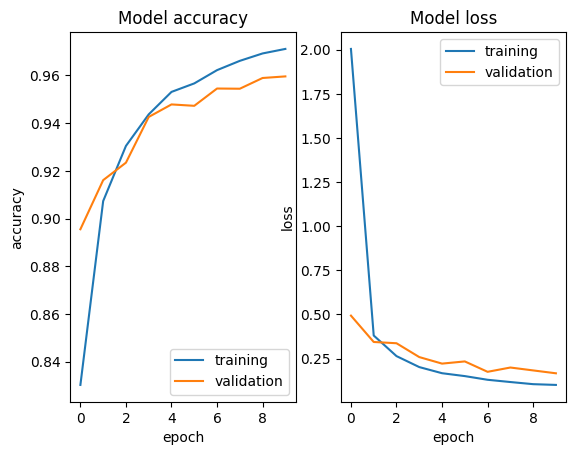

In [22]:
# Here I show the graph for loss and accuracy on both training and validation set
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['training', 'validation'], loc='lower right')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['training', 'validation'], loc='upper right')

In [23]:
# Evaluation on test set
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1815 - accuracy: 0.9608


[0.18147625029087067, 0.9607999920845032]